In [106]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers import LSTM
from keras.layers import Embedding
from keras.optimizers import SGD

from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

from keras.backend import argmax
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.utils import to_categorical

In [107]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [108]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        b= dataset[i:(i+look_back),1]
        
        dataX.append((a,b))
        n=round((i / 6) % 24)
        #n=((i) / 6) % 24
        #n=n/24
        dataY.append(n)
    return numpy.array(dataX), numpy.array(dataY)

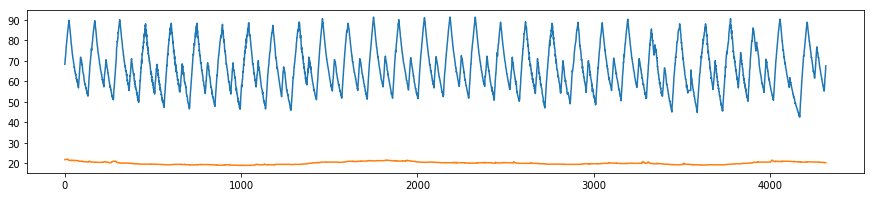

In [109]:
Pdataset = pandas.read_csv('piecstyczen.csv', usecols=[2,3], engine='python', skipfooter=3)
plt.figure(figsize=(15,3))
plt.plot(Pdataset)
plt.show()

In [110]:
Pdataset.tail(4)

,C1,C2
4313,63.50,20.3
4314,64.25,20.3
4315,66.25,20.3
4316,67.50,20.3


In [111]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(Pdataset)

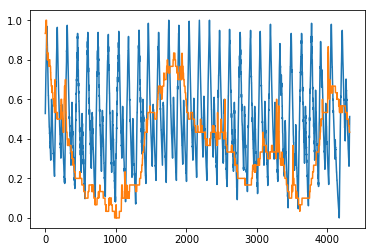

In [112]:
plt.plot(dataset)
plt.show()

In [113]:
dataset

array([[0.52820513, 0.93333333],
       [0.55384615, 0.93333333],
       [0.56923077, 0.93333333],
       ...,
       [0.44615385, 0.43333333],
       [0.48717949, 0.43333333],
       [0.51282051, 0.43333333]])

In [114]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

2892 1425


In [115]:
# reshape into X=t and Y=t+1
look_back = 60
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [116]:
trainX.shape

(2831, 60)

In [117]:
# reshape input to be [samples, time steps, features]
#trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [118]:
print(trainX.shape)
#dataset.shape
print(trainY.shape)
print(train.shape)

(2831, 60)
(2831,)
(2892, 2)


<Figure size 1080x216 with 0 Axes>

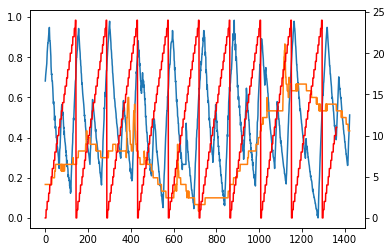

In [119]:
plt.figure(figsize=(15,3))

fig, ax1 = plt.subplots()


ax2 = ax1.twinx()
ax1.plot(test)

ax2.plot(testY,color="red")
plt.show()

In [120]:
trainY


array([ 0,  0,  0, ..., 15, 16, 16])

In [123]:
data_dim = look_back
timesteps=2
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=look_back))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])



In [128]:
trainYO = to_categorical(trainY, num_classes=25)
testYO = to_categorical(testY, num_classes=25)



model.fit(trainX, trainYO,
          batch_size=16, epochs=135, shuffle=False      )

Epoch 1/135
2831/2831 [==============================] - 1s 263us/step - loss: 1.2836 - acc: 0.5019
Epoch 2/135
2831/2831 [==============================] - 1s 178us/step - loss: 1.2367 - acc: 0.5122
Epoch 3/135
2831/2831 [==============================] - 0s 61us/step - loss: 1.2532 - acc: 0.5140
Epoch 4/135
2831/2831 [==============================] - 0s 48us/step - loss: 1.2839 - acc: 0.5203
Epoch 5/135
2831/2831 [==============================] - 0s 48us/step - loss: 1.2950 - acc: 0.4995
Epoch 6/135
2831/2831 [==============================] - 0s 48us/step - loss: 1.2673 - acc: 0.4998
Epoch 7/135
2831/2831 [==============================] - 0s 49us/step - loss: 1.2770 - acc: 0.5058
Epoch 8/135
2831/2831 [==============================] - 0s 49us/step - loss: 1.2747 - acc: 0.5125
Epoch 9/135
2831/2831 [==============================] - 0s 49us/step - loss: 1.2470 - acc: 0.5125
Epoch 10/135
2831/2831 [==============================] - 0s 48us/step - loss: 1.2440 - acc: 0.5182
Epoch 1

Epoch 83/135
2831/2831 [==============================] - 0s 48us/step - loss: 1.2613 - acc: 0.5214
Epoch 84/135
2831/2831 [==============================] - 0s 48us/step - loss: 1.2564 - acc: 0.5302
Epoch 85/135
2831/2831 [==============================] - 0s 48us/step - loss: 1.2123 - acc: 0.5404
Epoch 86/135
2831/2831 [==============================] - 0s 48us/step - loss: 1.2391 - acc: 0.5245
Epoch 87/135
2831/2831 [==============================] - 0s 48us/step - loss: 1.2331 - acc: 0.5309
Epoch 88/135
2831/2831 [==============================] - 0s 48us/step - loss: 1.2701 - acc: 0.5132
Epoch 89/135
2831/2831 [==============================] - 0s 48us/step - loss: 1.2578 - acc: 0.5344
Epoch 90/135
2831/2831 [==============================] - 0s 48us/step - loss: 1.2400 - acc: 0.5129
Epoch 91/135
2831/2831 [==============================] - 0s 49us/step - loss: 1.2234 - acc: 0.5302
Epoch 92/135
2831/2831 [==============================] - 0s 48us/step - loss: 1.2253 - acc: 0.5482


In [129]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                3904      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 25)                1625      
Total params: 9,689
Trainable params: 9,689
Non-trainable params: 0
_________________________________________________________________


In [130]:
model.evaluate(testX, testYO)

1364/1364 [==============================] - 0s 25us/step


[5.292066718825846, 0.053519061583577714]

In [131]:
score = model.evaluate(trainX, trainYO, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


2831/2831 [==============================] - 0s 78us/step
Test loss: 0.7710521867211233
Test accuracy: 0.7142352526240954


In [132]:
# make predictions
trainPredict1 = model.predict(trainX)
testPredict1 = model.predict(testX)
trainPredict1

array([[2.7420232e-01, 2.4378781e-01, 4.4594526e-02, ..., 5.1493805e-02,
        1.7311478e-01, 1.8326874e-01],
       [2.7595043e-01, 2.5619298e-01, 5.3861428e-02, ..., 4.4319801e-02,
        1.5624198e-01, 1.7485961e-01],
       [2.7498063e-01, 2.6557121e-01, 6.4665481e-02, ..., 3.7691556e-02,
        1.3961282e-01, 1.6511288e-01],
       ...,
       [3.2169238e-09, 2.2233775e-09, 3.1877782e-08, ..., 1.0047587e-07,
        3.4480596e-08, 1.3017948e-08],
       [1.9054147e-09, 1.2907370e-09, 1.4457424e-08, ..., 4.9159482e-08,
        1.9175015e-08, 7.9471976e-09],
       [7.3062650e-10, 5.2772109e-10, 5.2356564e-09, ..., 1.8123313e-08,
        7.1892101e-09, 3.1319038e-09]], dtype=float32)

In [133]:
#softmax(trainPredict)
trainPredict=numpy.argmax(trainPredict1,1)
testPredict=numpy.argmax(testPredict1,1)
trainPredict

array([ 0,  0,  0, ..., 15, 15, 15])

In [134]:
# invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])

In [135]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 2.641 RMSE
Test Score: 6.357 RMSE


(4317, 2)


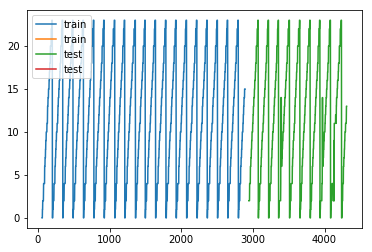

In [136]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
print(trainPredictPlot.shape)
trainPredictPlot[look_back:len(trainPredict)+look_back, 0] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)-7:len(dataset)-9, 0] = testPredict
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset),label="set")
plt.plot(trainPredictPlot,label="train")
plt.plot(testPredictPlot,label="test")
plt.legend()
plt.show()

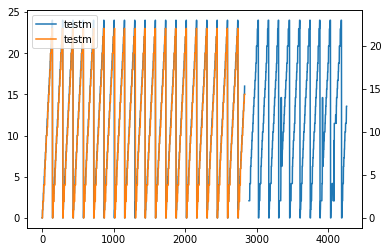

In [137]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
wws=2;
trainPredictPlot[wws:len(trainPredict)+wws,0] = trainPredict
wws=60
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+wws+1:len(dataset)-look_back-1, 0] = testPredict
# plot baseline and predictions

fig, ax1 = plt.subplots()


ax2 = ax1.twinx()
ax1.plot(trainY,label="set")
ax1.plot(trainPredictPlot,label="train")
ax2.plot(testPredictPlot,label="testm")
#plt.figure(figsize=(15,3))

plt.legend()
plt.show()